In [1]:
import numpy as np
import pandas as pd
from edempy import Deck
from extrapolation import extrapolation
from LaceyClass import LaceyMixingAnalyzer
import matplotlib.pyplot as plt
from rnn.data_loader_rnn import RNNLoader
from rnn.rnn_extrap import plot_particles, import_dict
import os


sim_names = ["Rot_drum_mono", "Rot_drum_binary_mixed", "Rot_drum_400k"]
sim_name = sim_names[-1]
sim_path =rf"V:\GrNN_EDEM-Sims\{sim_name}.dem"

In [2]:
lacey_settings = f"{sim_path[:-4]}_data\Export_Data\Lacey_settings.txt"

with open(lacey_settings, 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = int(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins)
rnn = RNNLoader(1,20,sim_path)


In [8]:
delta_t = 0.05
b_coords_lacey, div_size_lacey = lacey.grid()
extrapolated_lacey = []
extrapolated_time = []
id_dict_path = rf"V:\GrNN_EDEM-Sims\{sim_name}_data\Export_Data"
id_dict = import_dict(id_dict_path, "id_dict")
plots_path = rf"{sim_path[:-4]}_data\Export_Data\dem_sim_plots"


# for timestep in np.arange(rnn.start_t, rnn.end_t+delta_t, delta_t):
#     timestep_i = rnn.find_nearest(timestep, rnn.deck.timestepValues)
#     particles = rnn.get_particle_data(timestep_i)
#     particles = np.delete(particles, [3,4,5], 1)

#     plot_filename = rf"{plots_path}\{timestep:.2f}.png"
#     pred_t_mass = plot_particles(particles, id_dict, True, timestep, plot_path=plot_filename)
#     mass_1, mass_2, conc = lacey.bining(b_coords_lacey, div_size_lacey, pred_t_mass, cut_off)
#     Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(pred_t_mass))
#     print(f"{timestep}: {Lacey_index}")
#     extrapolated_lacey.append(Lacey_index)
#     extrapolated_time.append(timestep)
    

In [6]:
extrapolated_lacey

[0.009464043362626141,
 0.045450049569653934,
 0.07299337596195439,
 0.08091594659701017,
 0.07428533515902991,
 0.07472716229223061,
 0.07844606430779302,
 0.0795824259185704,
 0.07232551511859127,
 0.07935263266281108,
 0.08839873179931652,
 0.08111751092117485,
 0.07591366868776468,
 0.11161622495841815,
 0.12351424291558262,
 0.16364078516805267,
 0.16638512729393307,
 0.1439743192154621,
 0.141887908629971,
 0.14935575767695455,
 0.15837630736189562,
 0.15789258788425817,
 0.1408818033997381,
 0.1357926273371867,
 0.12663373742742473,
 0.12717301624992805,
 0.13190237276681138,
 0.15537750376317427,
 0.1632563075147848,
 0.14943905773594296,
 0.12231785191297205,
 0.12440334736301313,
 0.14343557132558934,
 0.14934020033147935,
 0.14614242116388393,
 0.15076609336103494,
 0.16310225964169206,
 0.17620822293109423,
 0.1960485031862169,
 0.21452591582256003,
 0.20852712700147408,
 0.19140156610541956,
 0.16428243021051672,
 0.1612853192596264,
 0.1908077858044334,
 0.190876919011651

In [7]:
np.savetxt(rf"{plots_path}\_lacey.csv", np.column_stack((extrapolated_time, extrapolated_lacey)), delimiter=",")

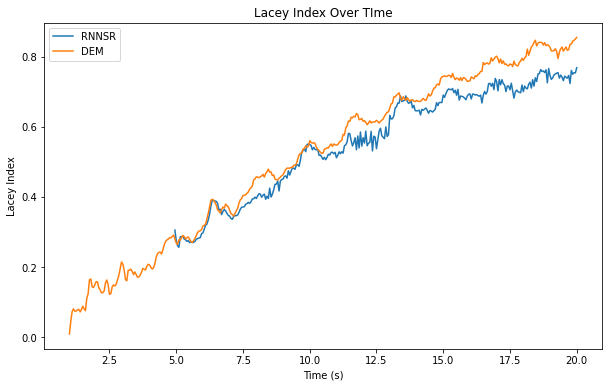

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path where your CSV files are located
folder_path = id_dict_path

# Initialize an empty list to store numpy arrays from each file
data_arrays = []

# Function to read CSV file and return a numpy array
def read_csv_to_numpy(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Iterate through all files in the folder and its subfolders
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('_lacey.csv'):
            file_path = os.path.join(root, filename)
            
            # Read the CSV file and append the numpy array to data_arrays
            data_arrays.append(read_csv_to_numpy(file_path))

# Plot the data from all files
plt.figure(figsize=(10, 6))

for i, data_array in enumerate(data_arrays):
    
    if i == 0:
    # Customize the plot as needed using commands like plt.plot() or plt.scatter()
        plt.plot(data_array[:, 0], data_array[:, 1], label="RNNSR")
    else:
        plt.plot(data_array[:, 0], data_array[:, 1], label="DEM")

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Lacey Index')
plt.title('Lacey Index Over TIme')
plt.legend()
plt.show()
